# Face Recognition

The last step is the face recognition. To do it, we must consider our dataset with the embedded images and a test set. How the face recognition works? It's very simple, we give an input image, we resize it and realize the face detection. From the detection we extract the embedded vector. From this moment, we can recognize the images. Whit the compare_faces function, we classify the images obtained with the images from our dataset of embedded images come from the next step. This function will say if the current image matches with the trained images, returning a list of matched images containing True or False. From this list we can print our face detection and recognition.

## Importing Libraries

In [1]:
import face_recognition
import pickle
import cv2
from imutils import paths, resize
import matplotlib.pyplot as plt

## Setting the dataset

**Loading the dataset with the embedded images**

In [2]:
data = pickle.loads(open("output/encodings.pickle", "rb").read())

**Setting the path for the test images**

In [3]:
dataset = "/home/igor/Documents/Artificial_Inteligence/Formation/Computer Vision Training/5 - Face Recognition/images"

**List of Images**

In [4]:
imagesPath = list(paths.list_images(dataset))

## Recognizing the faces

- Read images from disk
- Resize the images considering the aspect ratio
- Put the channel in RGB order
- Detect the faces and encode them
- From the list of encoded image we make the classification to verify is any image matches with the known faces
- Store the names of the faces
- Print out the recognition

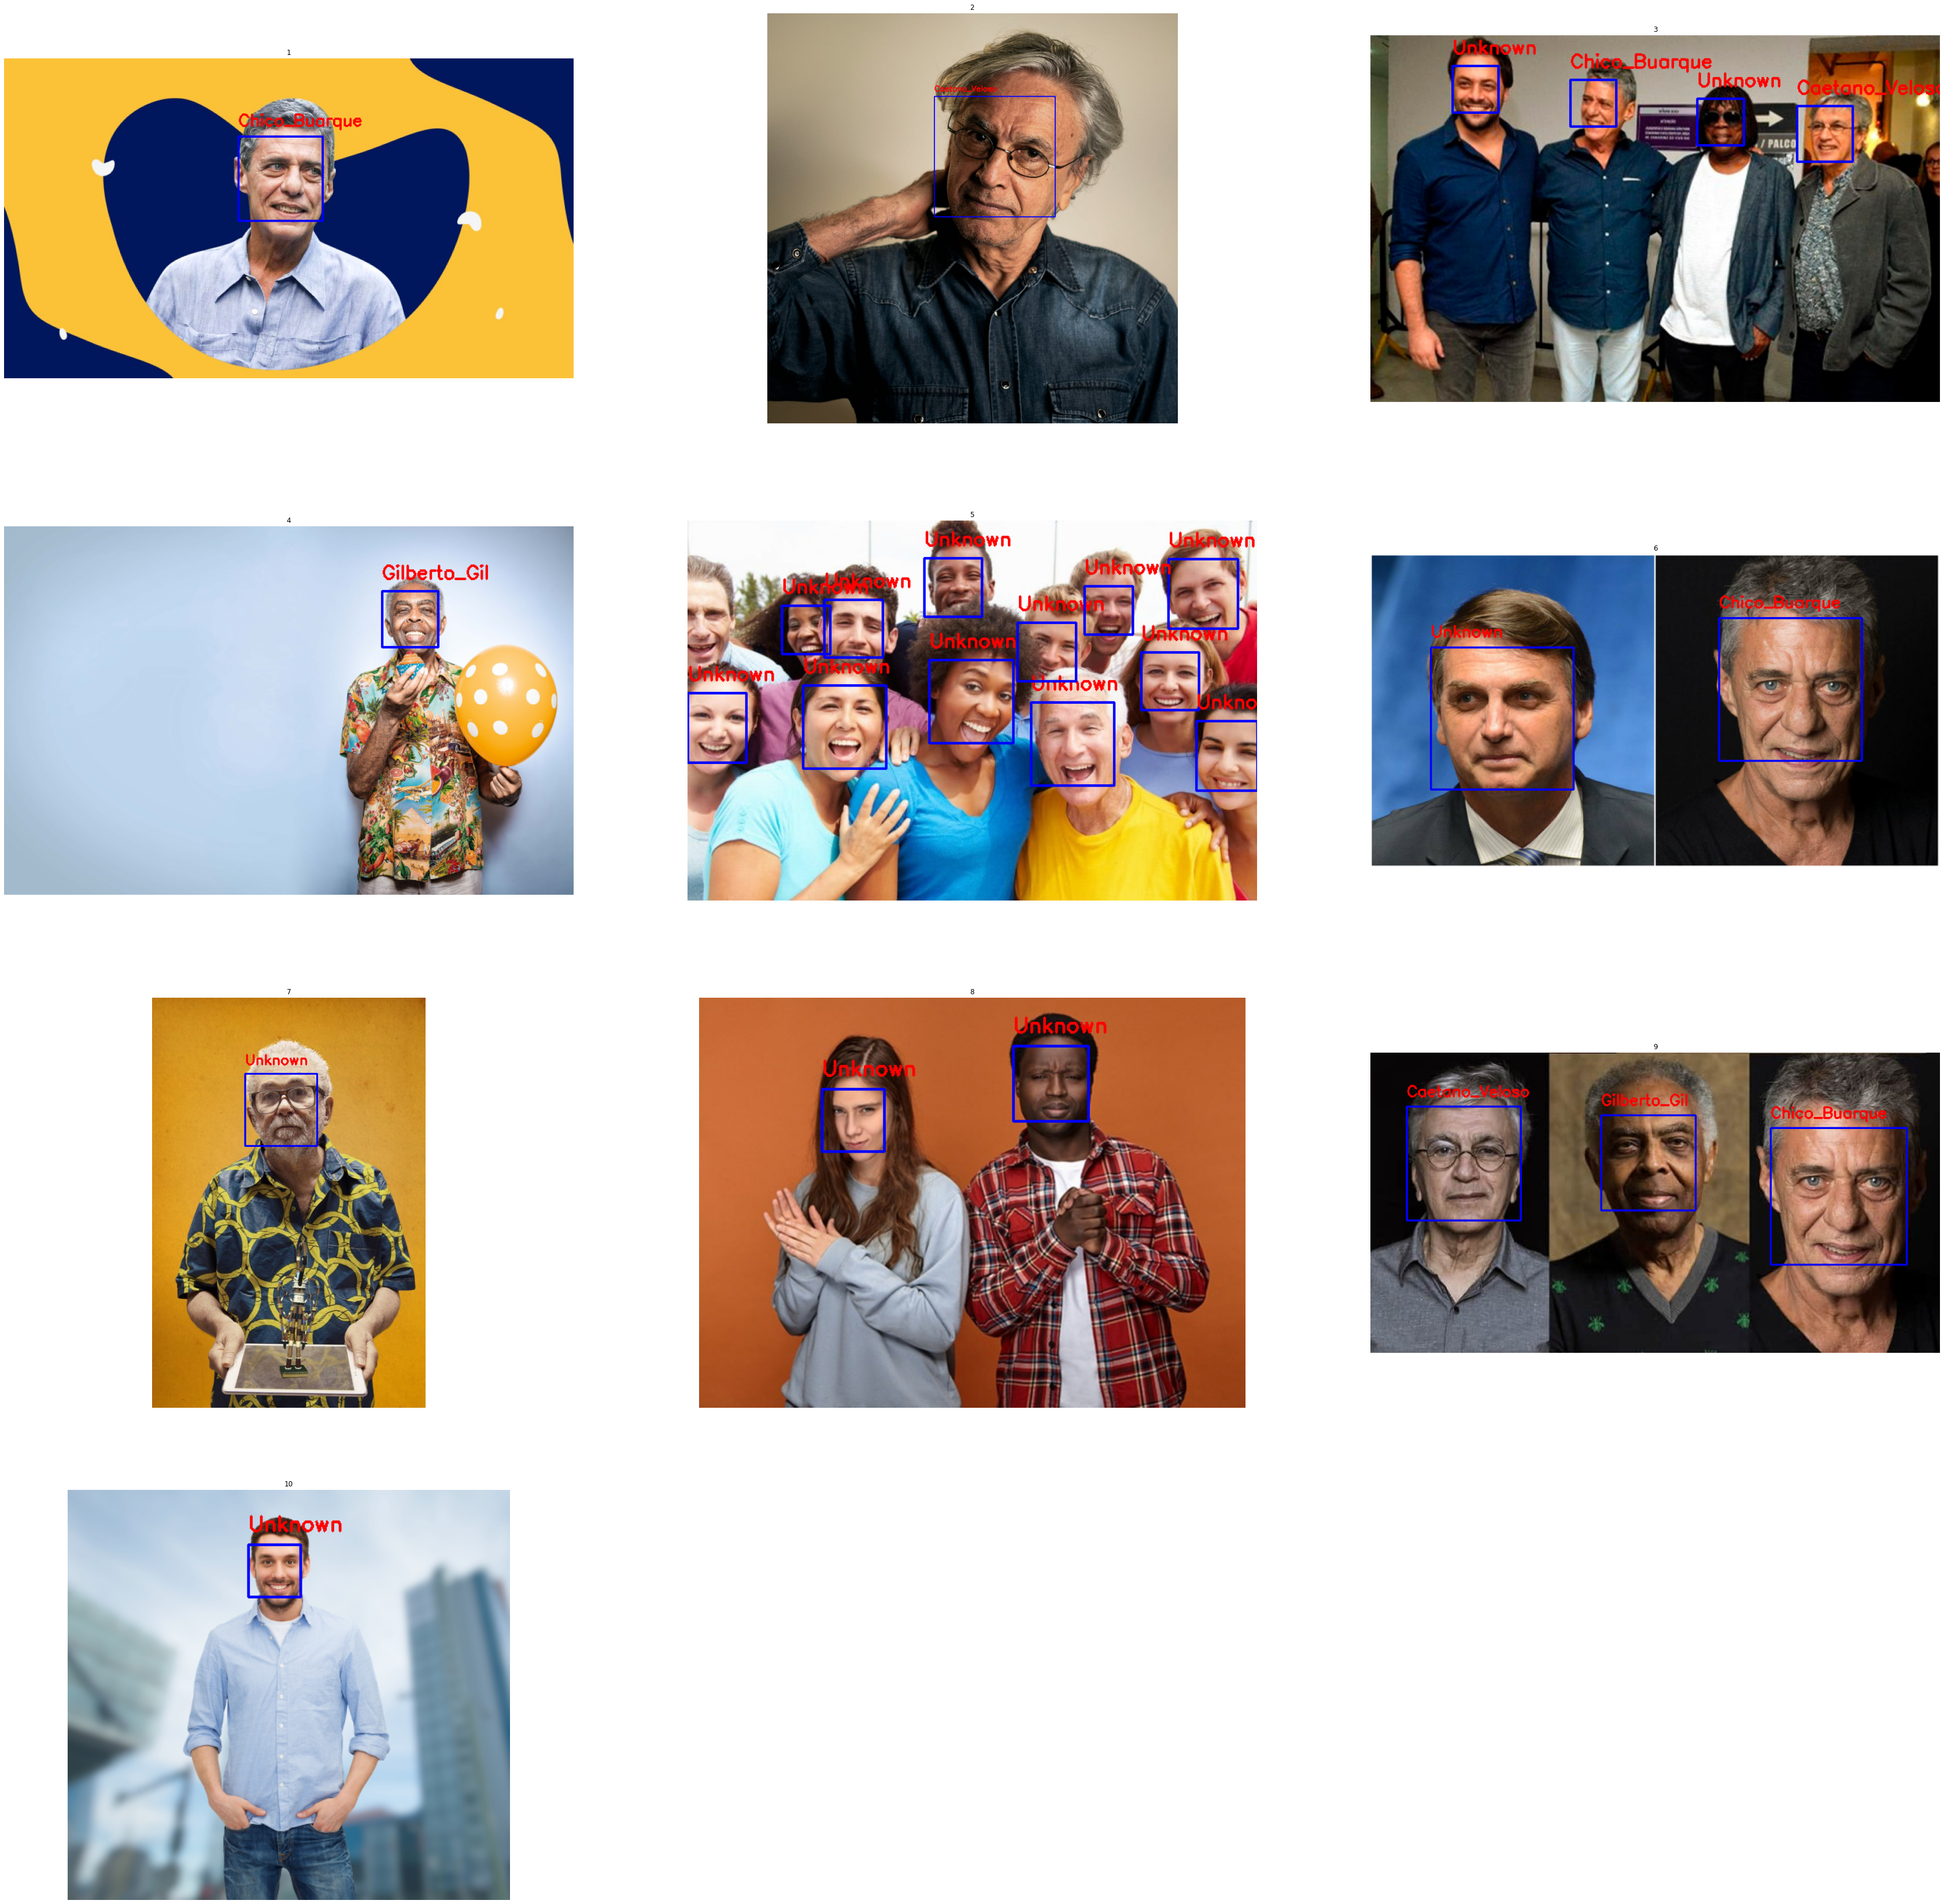

In [5]:
plt.figure(figsize=(60, 60))
count = 1
for img in imagesPath:
    # read images from disk and changing the channel order
    image = cv2.imread(img)
    (h, w) = image.shape[:2]
    if h > w:
        image = resize(image, width=448)
    if h < w:
        image = resize(image, height=448)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # extracting the box of the detected faces
    boxes = face_recognition.face_locations(rgb, model="cnn")
    # Converting the face into a 128-d vector
    encodings = face_recognition.face_encodings(rgb, boxes)
    
    # Creating an empty list of names for the recognition
    names = []
    
    # Recognition step    
    for encoding in encodings:
    
        # comparing the extract images with the embeddings images from dataset
        matches = face_recognition.compare_faces(data["encodings"], encoding)
        name = "Unknown"
        if True in matches:
            # find the indexes of all matched faces then initialize a
            # dictionary to count the total number of times each face
            # was matched
            matchedIdxs = [i for (i, b) in enumerate(matches) if b]
            counts = {}
            # loop over the matched indexes and maintain a count for
            # each recognized face face
            for i in matchedIdxs:
                name = data["names"][i]
                counts[name] = counts.get(name, 0) + 1
            # determine the recognized face with the largest number of
            # votes (note: in the event of an unlikely tie Python will
            # select first entry in the dictionary)
            name = max(counts, key=counts.get)
        names.append(name)


    # update the list of names
    
    for ((top, right, bottom, left), name) in zip(boxes, names):
    # draw the predicted face name on the image
        cv2.rectangle(image, (left, top), (right, bottom), (255, 0, 0), 2)
        y = top - 15 if top - 15 > 15 else top + 15
        cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
    ax = plt.subplot(4, 3, count)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("{:d}".format(count))
    plt.axis("off")
    count += 1
plt.savefig("output/recognitions.jpg")
plt.show()

## Conclusion

Face Recognition using embedding images is a very powerful method. The Face Recognition library aids us to do it very quickly, taking care about the image preprocessing, this assure a good performance. 